La page ci-présente existe en version notebook téléchargeable grâce au bouton ![Bouton](./images/bouton_tl.png) (choisir le format `.ipynb`). On rappelle qu'l faut ensuite l'enregistrer dans un répertoire adéquat sur votre ordinateur (`capa_num` par exemple dans votre répertoire personnel) puis lancer Jupyter Notebook depuis Anaconda pour accéder au notebook, le modifier et exécutez les cellules de code adéquates.

__Si vous vous sentez suffisamment à l'aise,__ vous pouvez passer directement à l'[étude approfondie](equation_stationnaire_fonction).

# Implémentation basique
Nous allons ici implémenter sans utiliser de fonction les deux méthodes de recherche de racine pour réaliser la recherche d'un point de fonctionnement et étudier le redressement monoalternance.

(pos_pb_eq)=
## Position du problème.
On considère un générateur idéal de tension délivrant une tension $E$ branché en série avec une résistance $R = 100 \rm{\Omega}$ et une diode $D$ dont la relation intensité tension est:

````{panels}
$$
i = I_s\left(\exp \left(\frac{u_D}{V_T}\right) - 1\right)
$$

avec $I_s = 95 \rm{\mu A}$ et $V_D = 30 \rm{mV}$
---
```{figure} ./images/diode.png
:name: label_image
:align: center
:width: 150px
Titre
```
````

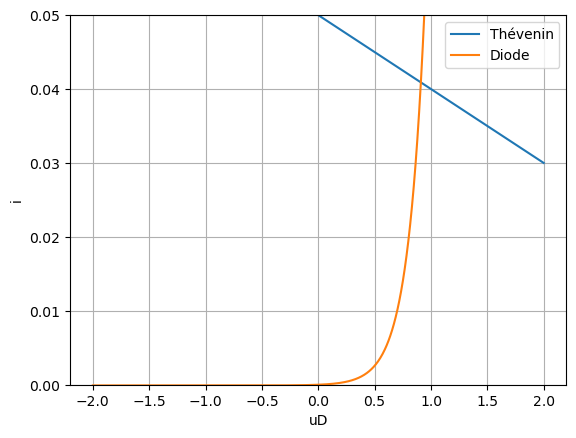

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


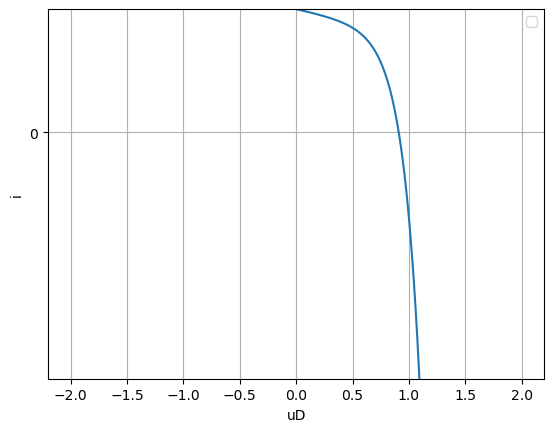

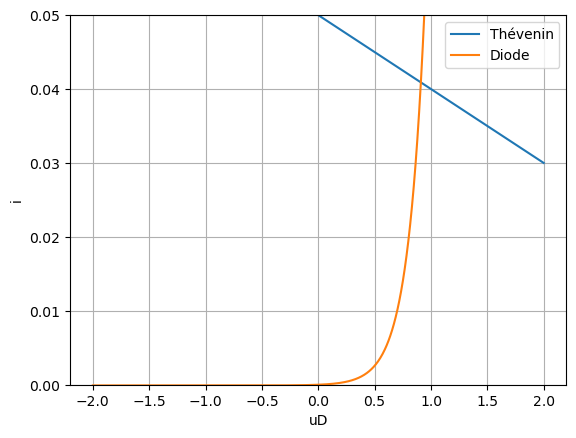

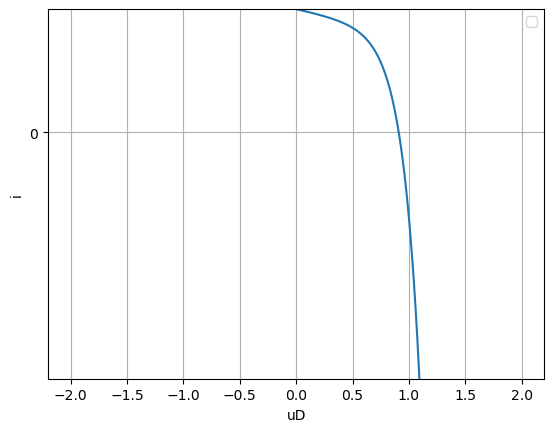

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

Is = 95e-6
VT = 150e-3
E = 5
R = 100


def f1(x):
    return (E - x) / R - Is * (np.exp(x / VT) - 1)


def fT(x):
    return (E - x) / R


def fD(x):
    return Is * (np.exp(x / VT) - 1)


x = np.linspace(-2, 2, 1000)
y1 = f1(x)
yT = fT(x)
yD = fD(x)

fp, axp = plt.subplots()
axp.set_xlabel("uD")
axp.set_ylabel("i")
axp.plot(x, fT(x), label="Thévenin")
axp.plot(x, fD(x), label="Diode")
axp.set_ylim((-1, 1))
axp.set_ylim((0 , .05))
axp.grid()
axp.legend()
glue("pt_fonc", fp, display=False)

fi, axi = plt.subplots()
axi.set_xlabel("uD")
axi.set_ylabel("i")
axi.plot(x, f1(x))
axi.set_ylim((-1, 1))
axi.set_ylim((-0.1 , .05))
axi.set_yticks([0])
axi.set_yticklabels(["0"])
axi.grid()
axi.legend()
glue("eq_res", fi, display=False)

La loi des mailles s'écrit: $E - Ri = u_D$ soit $\frac{E}{R} - \frac{u_D}{R} = I_s\left(\exp \left(\frac{u_D}{V_T}\right) - 1\right)$. On doit donc rechercher l'[intersection entre une droite et une exponentielle](pt_fc) ce qui est n'est pas possible analytiquement. On va donc chercher la [racine de la fonction](eq_rs):

$$
  f(u) = \frac{E-u}{R} - I_s\left(\exp \left(\frac{u}{V_T}\right) - 1\right)
$$

````{panels}
```{glue:figure} pt_fonc
:name: pt_fc
:align: center
Point de fonctionnement
```
---
```{glue:figure} eq_res
:name: eq_rs
:align: center
Fonction $f$ à étudier
```
````

## Etude préliminaire

> __Exercice A:__  
> On prend $E = 1\rm{V}$.
> 1. Importer les bibliothèques `numpy` et `matplotlib.pyplot`
> 1. Définir la variable $E$ puis une fonction `f_test` qui renvoie la valeur de $f$ pour une tension $u$ donnée en argument de la fonction. (__On définira $E$ de manière globale hors de la fonction pour pouvoir modifier sa valeur par la suite.__ Pour le reste, on peut les définir dans la fonction.)
> 1. Tracer la fonction $f$ entre $[-1,1]$ et vérifier graphiquement qu'il n'y bien qu'une seule racine dans l'intervalle (_Note: On peut démontrer que la fonction est strictement décroissante, on a donc bien unicité de la racine quand elle existe._)

## Méthode par dichotomie
> __Exercice B:__  
> Ecrire une suite d'instruction:
> 1. (Initialisation): Définir les bornes `a` et `b` initiales de l'intervalle de recherche et la précision `prec` recherche sur $u$ (on prendra une précision de $10^{-6} V$.). _ Vous pouvez, au cas où tester si $f(a)$ ou $f(b)$ est nul et le cas échéant changer l'intervalle pour qu'il soit de longueur nulle (mais bon...)._
> 2. (Boucle) : La boucle devra être réalisée tant que la largeur de l'intervalle $[a,b]$ est supérieur à `prec`. Quel type de boucle utiliser ? A l'intérieur de la boucle:
>     1. Calculer le milieu de l'intervale `c` et tester si $f$ s'annule en `c`. Si c'est le cas, assigner $c$ à $a$ ET $b$ (l'intervalle est alors de longueur nulle et la boucle se terminera).
>     2. Sinon si $f(a)f(c) < 0$, assigner c à b et recommencer.
>     2. Sinon, assigner c à a et recommencer.
> 3. Afficher la valeur du milieu du dernier intervalle $c_{finale}$ et la valeur de $f(c_{finale})$. Vérifier la cohérence de la valeur obtenue avec le graphique tracé précédemment.

> __Exercice Bbis:__  
> Reprendre la série d'instructions précédentes mais remplacer le critère d'arrêt de la boucle par un test sur le $max(f(a), f(b))$ qui doit être inférieur la précision choisie ($10^{-6} A$). Obtient-on une valeur plus ou moins précise de la tension finale ?

````{attention}
L'observation précédente n'est pas une généralité. Suivant la pente de la fonction autour de 0, le test sur l'abscisse ou l'ordonnée seront plus ou moins performants. _On peut d'ailleurs faire les deux si besoin._
````

## Méthode de Newton
La méthode de Newton n'étant pas officiellement au programme en physique, __ne faire cette partie QUE si vous êtes suffisamment en avance (ET que vous avez fini la partie suivante)__.
> __Exercice C:__  
> 1. (Initialisation) Choisir une valeur $x_0$ dans l'intervalle de départ à stocker dans `x0`.
> 2. (Boucle) Critère pour continuer : $f(x_0)> prec$. On prendra une précision de $10^{-6}A$. Calculer $x_1$ défini par la méthode de Newton et l'assigner à la variable `x0`.
> 3. Vérifier que la valeur finale est cohérente avec les études précédentes.
> 4. Ajouter un compteur aux deux méthodes (dichotomie et Newton) et comparer le nombre d'itération dans les deux cas.